## Goal: Classify flowers into species using petal/sepal measurements.
## Algorithm: K-Nearest Neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# 1. Load dataset

iris = load_iris()
X = iris.data
y = iris.target

# 2. Convert to DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# 3. Display first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
# 2. Split train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
# 3. Train and evaluate KNN for different k
k_values = [1, 3, 5, 7]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.3f}")



K=1, Accuracy=0.967
K=3, Accuracy=1.000
K=5, Accuracy=1.000
K=7, Accuracy=0.967


## Conclusion:

Best KNN = k=3 , 5



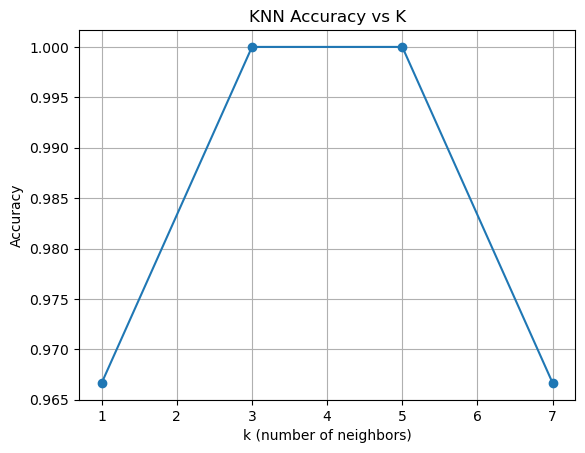

In [5]:
# 4. Plot accuracy vs k
plt.plot(k_values, accuracies, marker="o")
plt.title("KNN Accuracy vs K")
plt.xlabel("k (number of neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [6]:
# Initialize and train
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

# Accuracy
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Logistic Regression Training Accuracy = {acc_train:.3f}")
print(f"Logistic Regression Test Accuracy = {acc_test:.3f}")


Logistic Regression Training Accuracy = 0.975
Logistic Regression Test Accuracy = 0.967


Logistic Regression Test Accuracy = 1.000


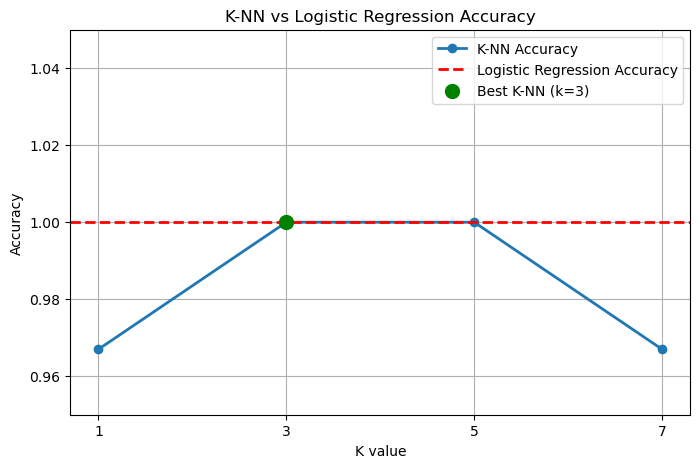

In [9]:
# Split dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred_lr = log_reg.predict(X_test)

# Compute accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Test Accuracy = {acc_lr:.3f}")


k_values = [1, 3, 5, 7]
knn_accuracies = [0.967, 1.0, 1.0, 0.967]

best_k = k_values[knn_accuracies.index(max(knn_accuracies))]
best_knn_acc = max(knn_accuracies)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(k_values, knn_accuracies, marker='o', label='K-NN Accuracy', linewidth=2)
plt.axhline(y=acc_lr, color='r', linestyle='--', label='Logistic Regression Accuracy', linewidth=2)
plt.scatter(best_k, best_knn_acc, color='green', s=100, zorder=5, label=f'Best K-NN (k={best_k})')

plt.title("K-NN vs Logistic Regression Accuracy")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.ylim(0.95, 1.05)
plt.grid(True)
plt.legend()
plt.show()




### **Interpretation / Conclusion:**

* The model performs very well on both training and test sets.
* The small difference (97.5% vs 96.7%) indicates **minimal overfitting**.
* Logistic Regression is a strong classifier for the Iris dataset, comparable to K-NN at moderate `k` values (`k=3` or `k=5`), which achieve 100% test accuracy.

